# HW 1-3 Image Compression

In [62]:
# https://www.geeksforgeeks.org/image-compression-using-k-means-clustering/ 

import pandas as pd
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from joblib import dump
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [63]:
image = Image.open("data/football.bmp")
image

pixels_og = np.asarray(image)
pixels = np.reshape(pixels_og,(-1,3))


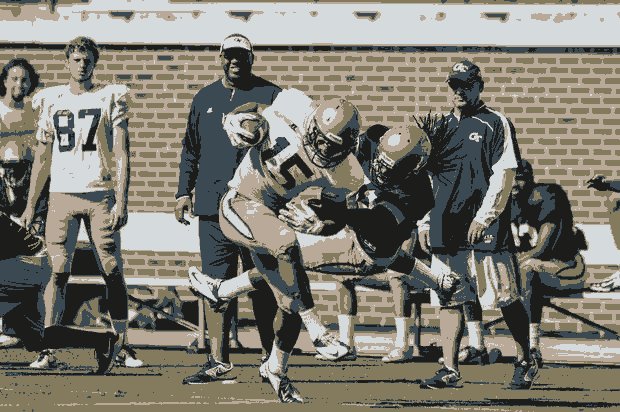

In [4]:
# SciPy Version
comp = KMeans(n_clusters=5,n_init=10)
comp.fit(pixels)
centroid = np.array([list(comp.cluster_centers_[label]) 
                           for label in comp.labels_])




centroid = centroid.astype("uint8")
# reshape this array according to the height and width of our image
centroids_reshaped = np.reshape(centroid, (image.height, image.width, 3), "C")


compressed_im = Image.fromarray(centroids_reshaped)

# display compressed image
compressed_im


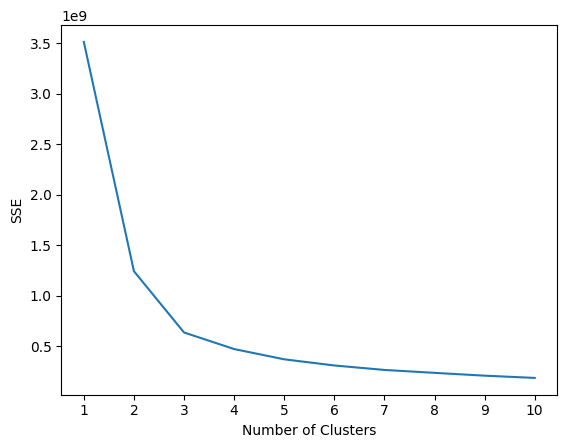

In [13]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pixels)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [8]:
"""
stop = 1
cluster = np.zeros((1,len(pixels)))
cluster_prev = cluster
it = 0

k = 5

centr = np.zeros((k,3))

for i in range(k):
    rand = np.random.choice(len(pixels),size=10, replace=False)
    centr[i] = np.mean(pixels[rand],axis=0)
    

while stop == 1:
    for id1 in range(len(pixels)):
        dist = np.zeros((1,k))
 
        for ic in range(k):
            dist_ = LA.norm((pixels[id1,:])-centr[ic,:])
            dist = np.append(dist, dist_)
        cluster_ = np.argmin(dist)
        cluster = np.append(cluster, cluster_)
    
    for ic in range(k):
        center = np.append(np.mean(pixels[:,clusters==ic],axis=0))
        
    if np.abs(cluster_prev - cluster) < 1e-4:
        stop = 0
        
    cluster_prev = cluster
    
    it += 1
"""



'\nstop = 1\ncluster = np.zeros((1,len(pixels)))\ncluster_prev = cluster\nit = 0\n\nk = 5\n\ncentr = np.zeros((k,3))\n\nfor i in range(k):\n    rand = np.random.choice(len(pixels),size=10, replace=False)\n    centr[i] = np.mean(pixels[rand],axis=0)\n    \n\nwhile stop == 1:\n    for id1 in range(len(pixels)):\n        dist = np.zeros((1,k))\n \n        for ic in range(k):\n            dist_ = LA.norm((pixels[id1,:])-centr[ic,:])\n            dist = np.append(dist, dist_)\n        cluster_ = np.argmin(dist)\n        cluster = np.append(cluster, cluster_)\n    \n    for ic in range(k):\n        center = np.append(np.mean(pixels[:,clusters==ic],axis=0))\n        \n    if np.abs(cluster_prev - cluster) < 1e-4:\n        stop = 0\n        \n    cluster_prev = cluster\n    \n    it += 1\n'

Iterations: 40


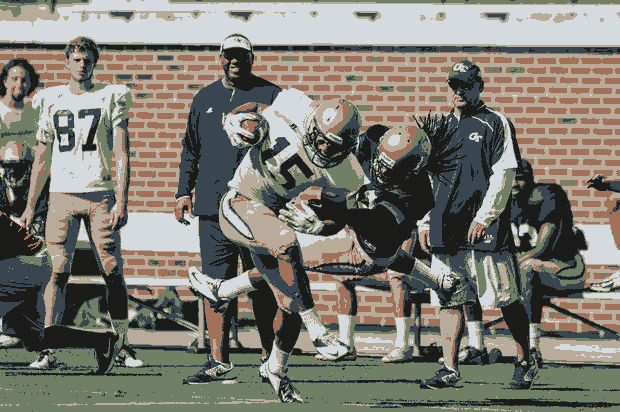

In [5]:
# My Version

def k_means(X, k, max_iters=1000):
    num_samples, num_features = X.shape

    # Initialize centroids randomly from data points
    centroids = X[np.random.choice(num_samples, k, replace=False)]
    iterations = 0
    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        iterations += 1
        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels, iterations



# Run k-means algorithm
centroids, labels, iterations = k_means(pixels, k)
#print("Final centroids:", centroids)
#print("Cluster labels:", labels)
print("Iterations:", iterations)
centroid = np.array([list(centroids[label]) 
                           for label in labels])

centroid = centroid.astype("uint8")
centroids_reshaped = np.reshape(centroid, (image.height, image.width, 3), "C")


compressed_im = Image.fromarray(centroids_reshaped)

# display compressed image
compressed_im



# HW 1-4 MNIST Dataset Clustering

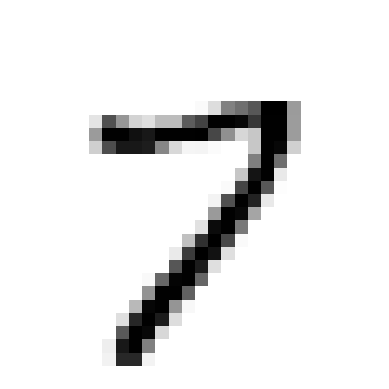

7


In [25]:
import scipy.io
from sklearn import metrics
mat = scipy.io.loadmat('data/mnist_10digits.mat')

xtrain = mat['xtrain']/255
ytrain = mat['ytrain']
xtest = mat['xtest']/255
ytest = mat['ytest']



some_digit = xtrain[30001]   # Selecting the 36,000th image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

print(ytrain[0,30001])

In [29]:
K = 10
comp = KMeans(n_clusters=K ,n_init=10)
comp.fit(xtrain)
ypred = comp.labels_
ypred1 = comp.predict(xtrain)



# centroid = np.array([list(comp.cluster_centers_[label]) 
#                            for label in comp.labels_])


In [28]:
def k_means(X, k, max_iters=1000):
    num_samples, num_features = X.shape

    # Initialize centroids randomly from data points
    centroids = X[np.random.choice(num_samples, k, replace=False)]
    iterations = 0
    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        print(1)
        #distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        distances_manhattan = np.sum(np.abs(X[:, np.newaxis] - centroids), axis=2)
        print(2)
        labels = np.argmin(distances_manhattan, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        iterations += 1
        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids
 
    return centroids, labels, iterations
K = 10
centroids, labels, iterations = k_means(xtrain, K)


1
2
1
2
1
2
1
2
1


KeyboardInterrupt: 

In [45]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(comp, ytest[0,:])
X_clusters = kmeans.predict(xtrain)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(ytest[:20])



IndexError: index 10009 is out of bounds for axis 0 with size 10000

In [59]:
labels = []
index = np.where(comp.labels_ == 1)
print(index)
print(ytest)
# append actual labels for each point in cluster
labels.append(ytest[index])

(array([    3,    11,    23, ..., 59993, 59994, 59999]),)
[[7 2 1 ... 4 5 6]]


IndexError: index 3 is out of bounds for axis 0 with size 1

In [104]:
def purity_score(y_true, y_pred,index):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # print(np.sum(contingency_matrix,axis=0)) # colujmns
    # print(np.sum(contingency_matrix,axis=1)) # rows
    # return purity
    return np.amax(contingency_matrix[index], axis=0) / np.sum(contingency_matrix[index]) 

for i in range(K):
    print(purity_score(ytrain,ypred,i), "\n")

purity = purity_score(ytrain,ypred,[0,9])
print(purity)
print(np.sum(purity))

0.47256457876076313 

0.5513200830614061 

0.7039274924471299 

0.6396998858261295 

0.545874700445053 

0.32429441062534586 

0.8303480905711389 

0.6022346368715084 

0.5884464194154845 

0.48781307782820643 

[0.01558288 0.2444407  0.00985512 0.0201314  0.20721024 0.23576482
 0.00143194 0.21091644 0.01356132 0.01524596]
0.9741408355795148


In [26]:
from sklearn.metrics import pairwise_distances_argmin_min

centroids_euclidean = comp.cluster_centers_

#closest_euclidean, _ = pairwise_distances_argmin_min(xtrain, centroids_euclidean)
K = 10
comp = KMeans(n_clusters=K ,n_init=10)
comp.fit(xtrain)
closest_euclidean = comp.predict(xtrain) 
purity_euclidean = []
for cluster_idx in range(K):
    cluster_mask = closest_euclidean == cluster_idx
    cluster_labels = ytrain[cluster_mask]
    most_common_label = np.bincount(cluster_labels).argmax()
    correct_assignments = np.sum(cluster_labels == most_common_label)
    purity_score = correct_assignments / len(cluster_labels)
    purity_euclidean.append(purity_score)

# Repeat the same steps for Manhattan distance (l1)
# ...

# Print purity scores for both distance metrics
print("Purity scores with Euclidean distance:", purity_euclidean)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 60000

# HW 1-5 Political Blog Dataset

In [68]:
import pandas as pd

df1 = pd.read_table("data/nodes.txt")
df2 = pd.read_table("data/edges.txt")

df1.tail()

#df2.head()

,1,100monkeystyping.com,0,Blogarama
1484,1486,youngconservative.blogspot.com,1,Blogarama
1485,1487,zebrax.blogs.com,1,BlogCatalog
1486,1488,zeke01.blogspot.com,1,"Blogarama,BlogCatalog"
1487,1489,zeke01.typepad.com,1,Blogarama
1488,1490,zeph1z.tripod.com/blog,1,Blogarama


In [72]:
len(df2)

19089